# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [61]:

import matplotlib.pyplot as plt
import requests
from scipy import stats
import numpy as np
import json
import pandas as pd
from api_keys import weather_api_key
import random
from citipy import citipy


In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units= "imperial"


## Generate Cities List

In [3]:
# for index,value in enumerate(cities[:5]):
#     print(index,value)
# for index in range(len(cities[:5])):
#     print(index,cities[index])
# for city in cities[:5]:
#     print(city)

In [4]:
# <open up my url> for 1 city
# for that particular url i would try to obtain all the information

In [8]:
# lists for latitudes and longitudes and cities

lat_lons = []
cities = []

# Use random to generate and add to lists random latitude and longitudes and citipy to find
# closest city and add to lists
lats = np.random.uniform(low=-90,high=90, size =1500)
lons = np.random.uniform(low=-180,high=180,size=1500)
lat_lons = zip(lats,lons)


for lat_lon in lat_lons:
    city = citipy.nearest_city(lat_lon[0],lat_lon[1]).city_name
    if city not in cities:
        cities.append(city)
            
               
# format open weather url               
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# create lists to collect metadata
city_name = []
lat_list = []
lon_list = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

print("Beginning Data Retreval")
print('----------------------------------------------------------')
# use enumerate for 
index_count = 0
set_count = 1
for city in cities:
    try:
        response = requests.get(f"{query_url}{city}").json()
        city_name.append(response['name'])
        lat_list.append(response['coord']['lat'])
        lon_list.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        if index_count > 49:
            index_count=0
            set_count+=1
        else:
            index_count+=1
        print(f"Processing Record {index_count} of Set {set_count}: {city}")
    except(KeyError, IndexError):
        print("City not found. Skipping...")
print('----------------------------------------------------------')
print('Data Retrieval Complete')
print('----------------------------------------------------------')

Beginning Data Retreval
----------------------------------------------------------
Processing Record 1 of Set 1: avarua
Processing Record 2 of Set 1: maarianhamina
City not found. Skipping...
Processing Record 3 of Set 1: port elizabeth
City not found. Skipping...
City not found. Skipping...
Processing Record 4 of Set 1: korla
Processing Record 5 of Set 1: punta arenas
Processing Record 6 of Set 1: cariati
Processing Record 7 of Set 1: cidreira
Processing Record 8 of Set 1: tiksi
City not found. Skipping...
Processing Record 9 of Set 1: sitka
City not found. Skipping...
Processing Record 10 of Set 1: sibu
Processing Record 11 of Set 1: albany
Processing Record 12 of Set 1: teguise
Processing Record 13 of Set 1: ranot
Processing Record 14 of Set 1: busselton
Processing Record 15 of Set 1: rikitea
Processing Record 16 of Set 1: ushuaia
Processing Record 17 of Set 1: ponta do sol
Processing Record 18 of Set 1: dingle
Processing Record 19 of Set 1: kasongo-lunda
Processing Record 20 of Set

Processing Record 34 of Set 4: wamba
Processing Record 35 of Set 4: saint-francois
Processing Record 36 of Set 4: komsomolskiy
Processing Record 37 of Set 4: kholodnyy
Processing Record 38 of Set 4: hays
Processing Record 39 of Set 4: tezu
Processing Record 40 of Set 4: ostrovnoy
Processing Record 41 of Set 4: vuktyl
Processing Record 42 of Set 4: kruisfontein
Processing Record 43 of Set 4: luderitz
Processing Record 44 of Set 4: aswan
Processing Record 45 of Set 4: hasaki
City not found. Skipping...
Processing Record 46 of Set 4: luanda
Processing Record 47 of Set 4: bredasdorp
Processing Record 48 of Set 4: chabahar
Processing Record 49 of Set 4: ripoll
Processing Record 50 of Set 4: jacareacanga
City not found. Skipping...
Processing Record 0 of Set 5: djambala
Processing Record 1 of Set 5: fonte boa
Processing Record 2 of Set 5: bambous virieux
Processing Record 3 of Set 5: antofagasta
Processing Record 4 of Set 5: anadyr
Processing Record 5 of Set 5: krasnoturansk
City not found. 

Processing Record 20 of Set 8: kincardine
Processing Record 21 of Set 8: severo-yeniseyskiy
City not found. Skipping...
Processing Record 22 of Set 8: marfino
Processing Record 23 of Set 8: muhos
Processing Record 24 of Set 8: nuuk
Processing Record 25 of Set 8: cairns
Processing Record 26 of Set 8: whyalla
Processing Record 27 of Set 8: amurzet
Processing Record 28 of Set 8: westport
City not found. Skipping...
Processing Record 29 of Set 8: jaten
Processing Record 30 of Set 8: gamba
Processing Record 31 of Set 8: nhulunbuy
Processing Record 32 of Set 8: rawson
Processing Record 33 of Set 8: ulundi
City not found. Skipping...
Processing Record 34 of Set 8: pierre
Processing Record 35 of Set 8: azare
Processing Record 36 of Set 8: portree
Processing Record 37 of Set 8: brigantine
Processing Record 38 of Set 8: uyuni
Processing Record 39 of Set 8: alma
Processing Record 40 of Set 8: kuah
Processing Record 41 of Set 8: alofi
Processing Record 42 of Set 8: sabha
Processing Record 43 of Se

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:

data_dict = {"City":city_name,'Lat':lat_list,'Lng':lon_list,'Max Temp':max_temp,
            'Humidity':humidity,'Cloudiness':cloudiness,'Wind Speed':wind_speed,
            'Country':country,'Date':date}
city_weather_df = pd.DataFrame(data_dict)

city_weather_df.to_csv(r'C:\Users\Joe\Documents\Boot_Camp\Homework\Week_6\06-Python-APIs\python-api-challenge\WeatherPy\Figures\WeatherPy_output.csv', index = False)


city_weather_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.21,-159.78,75.20,83,100,8.05,CK,1604195735
1,Mariehamn,60.10,19.93,48.20,87,0,16.11,AX,1604195736
2,Port Elizabeth,-33.92,25.57,64.40,82,75,8.05,ZA,1604195736
3,Korla,41.76,86.15,48.00,72,0,5.01,CN,1604195736
4,Punta Arenas,-53.15,-70.92,46.40,81,0,3.36,CL,1604195736
...,...,...,...,...,...,...,...,...,...
534,Nampula,-15.12,39.27,69.80,88,75,4.70,MZ,1604195715
535,Seymchan,62.88,152.43,16.07,93,100,5.23,RU,1604195813
536,Río Gallegos,-51.62,-69.22,50.00,71,0,3.36,AR,1604195813
537,Omsukchan,62.53,155.80,20.43,95,100,6.87,RU,1604195813


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [82]:

# Describe data to look for errors in humidity where max > 100
describe_weather_df=city_weather_df.describe()
describe_weather_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,5.390000e+02
mean,20.586327,15.301763,57.078701,73.116883,52.111317,7.951503,1.604196e+09
std,33.221217,89.545930,21.726712,20.526419,41.800627,5.824340,8.775940e+01
min,-54.800000,-175.200000,-8.000000,13.000000,0.000000,0.020000,1.604195e+09
25%,-7.480000,-64.960000,44.375000,64.000000,1.000000,3.655000,1.604196e+09
50%,25.350000,19.780000,61.090000,77.000000,67.000000,6.930000,1.604196e+09
75%,47.760000,89.310000,74.700000,88.000000,95.000000,10.290000,1.604196e+09
max,78.220000,179.320000,92.530000,100.000000,100.000000,50.000000,1.604196e+09


In [54]:
# city_weather_df.loc[ 2,"Lng" ]
# city_weather_df.loc[ : ,"Lng" ]
# city_weather_df.loc[1:2, 'Lng':'Max Temp']
# city_weather_df.loc[city_weather_df["Humidity"]<50 ,:]
# city_weather_df.loc[city_weather_df["Humidity"]>100,:]


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [18]:
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.21,-159.78,75.2,83,100,8.05,CK,1604195735
1,Mariehamn,60.10,19.93,48.2,87,0,16.11,AX,1604195736
2,Port Elizabeth,-33.92,25.57,64.4,82,75,8.05,ZA,1604195736
3,Korla,41.76,86.15,48.0,72,0,5.01,CN,1604195736
4,Punta Arenas,-53.15,-70.92,46.4,81,0,3.36,CL,1604195736


## Latitude vs. Humidity Plot

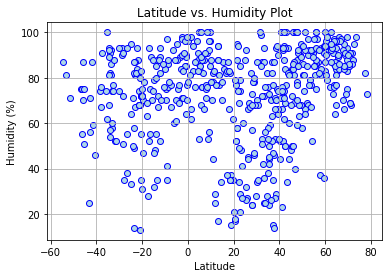

In [81]:
latitude_to_plot = city_weather_df.loc[:,'Lat']
humidity_to_plot = city_weather_df.loc[:,'Humidity']
plt.title ("Latitude vs. Humidity Plot")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


plt.scatter(latitude_to_plot,humidity_to_plot,marker = "o",color="lightblue", edgecolors="b",)
plt.grid(b=None, which='major', axis='both')
plt.savefig("Figures\latitude_vs_humidity.png")

## Latitude vs. Cloudiness Plot

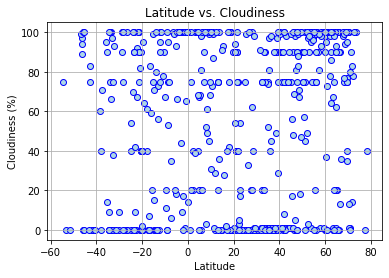

In [44]:
cloudiness_to_plot = city_weather_df.loc[:,'Cloudiness']
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.scatter(latitude_to_plot,cloudiness_to_plot,marker = "o",color="lightblue", edgecolors="b",)
plt.grid(b=None, which='major', axis='both')
plt.savefig("Figures\latitude_vs_cloudiness.png")

## Latitude vs. Wind Speed Plot

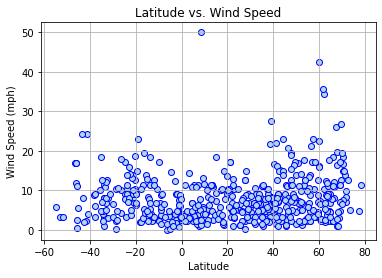

In [45]:
wind_speed_to_plot = city_weather_df.loc[:,'Wind Speed']
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.scatter(latitude_to_plot,wind_speed_to_plot,marker = "o",color="lightblue", edgecolors="b",)
plt.grid(b=None, which='major', axis='both')


## Linear Regression

In [50]:
# create separate dataframes for northern and southern hemispheres
northern_hem_df = city_weather_df.loc[city_weather_df['Lat']>=0]
southern_hem_df = city_weather_df.loc[city_weather_df['Lat']<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [87]:
# set variables for northern  latitudes and max temps
north_lats = northern_hem_df.loc[:,'Lat']
temp_north = northern_hem_df.loc[:,'Max Temp']

# perform linear regression on northern hem lats vs. max temp
(nt_slope,nt_int,nt_r,nt_p,nt_std_err)=stats.linregress(north_lats,temp_north)

In [88]:
# create equation of line for above
nt_fit = nt_slope * north_lats + nt_int
line_eq = "y = "+str(round(nt_slope,2))+ "x + " + str(round(nt_int,2))

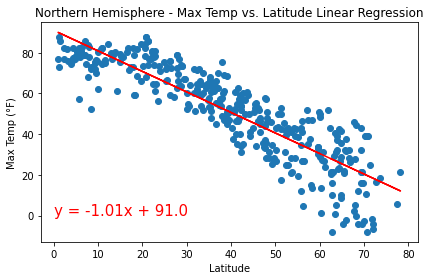

In [89]:
# plot the data and add line of regression

plt.scatter(north_lats,temp_north)
plt.plot(north_lats,nt_fit,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color='red')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (°F)')
plt.tight_layout()
plt.savefig(r'C:\Users\Joe\Documents\Boot_Camp\Homework\Week_6\06-Python-APIs\python-api-challenge\WeatherPy\Figures\North_MaxTemp_vs_Latitude.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [94]:
# Save variables for south latitudes
south_lats = southern_hem_df.loc[:,'Lat']
temp_south = southern_hem_df.loc[:,'Max Temp']
# perform linear regression on southern hem lats vs. max temp
(st_slope,st_int,st_r,st_p,st_std_err)=stats.linregress(south_lats,temp_south)

In [100]:
# create equation of line for above
st_fit = st_slope * south_lats + st_int
line_eq2 = "y = "+str(round(st_slope,2))+ "x + " + str(round(st_int,2))

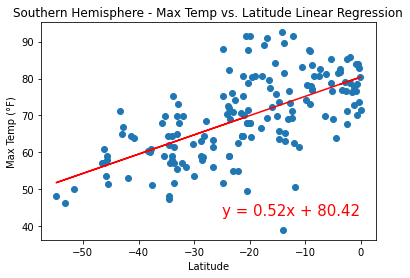

In [104]:
# plot the data and add line of regression

plt.scatter(south_lats,temp_south)
plt.plot(south_lats,st_fit,"r-")
plt.annotate(line_eq2,(-25,43),fontsize=15,color='red')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (°F)')

plt.savefig(r'C:\Users\Joe\Documents\Boot_Camp\Homework\Week_6\06-Python-APIs\python-api-challenge\WeatherPy\Figures\South_MaxTemp_vs_Latitude.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [105]:
# use north_lats from previous and create variable for humidity
humidity_north = northern_hem_df.loc[:,'Humidity']

# perform linear regression on northern hem lats vs. humidity
(nh_slope,nh_int,nh_r,nh_p,nh_std_err)=stats.linregress(north_lats,humidity_north)


In [106]:
# create equation of line for above
nh_fit = nh_slope * north_lats + nh_int
line_eq3 = "y = "+str(round(nh_slope,2))+ "x + " + str(round(nh_int,2))

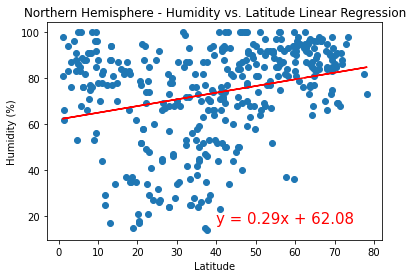

In [117]:
# plot the data and add line of regression

plt.scatter(north_lats,humidity_north)
plt.plot(north_lats,nh_fit,"r-")
plt.annotate(line_eq3,(40,17),fontsize=15,color='red')
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig(r'C:\Users\Joe\Documents\Boot_Camp\Homework\Week_6\06-Python-APIs\python-api-challenge\WeatherPy\Figures\North_Humidity_vs_Latitude.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [114]:
# use south_lats from previous and create variable for humidity
humidity_south = southern_hem_df.loc[:,'Humidity']

# perform linear regression on southern hem lats vs. humidity
(sh_slope,sh_int,sh_r,sh_p,sh_std_err)=stats.linregress(south_lats,humidity_south)


In [115]:
# create equation of line for above
sh_fit = sh_slope * south_lats + sh_int
line_eq4 = "y = "+str(round(sh_slope,2))+ "x + " + str(round(sh_int,2))

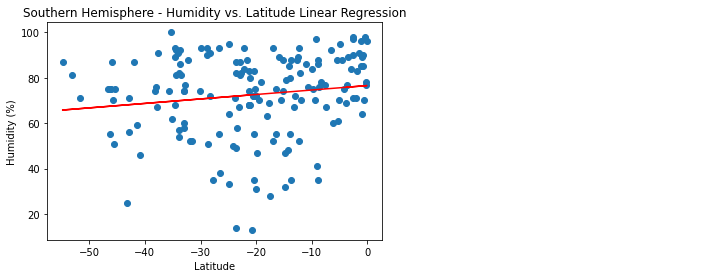

In [118]:
# plot the data and add line of regression

plt.scatter(south_lats,humidity_south)
plt.plot(south_lats,sh_fit,"r-")
plt.annotate(line_eq4,(40,17),fontsize=15,color='red')
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig(r'C:\Users\Joe\Documents\Boot_Camp\Homework\Week_6\06-Python-APIs\python-api-challenge\WeatherPy\Figures\South_Humidity_vs_Latitude.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [120]:
# use north_lats from previous and create variable for humidity
cloudiness_north = northern_hem_df.loc[:,'Cloudiness']

# perform linear regression on northern hem lats vs. humidity
(nc_slope,nc_int,nc_r,nc_p,nc_std_err)=stats.linregress(north_lats,cloudiness_north)


In [121]:
# create equation of line for above
nc_fit = nc_slope * north_lats + nc_int
line_eq5 = "y = "+str(round(nc_slope,2))+ "x + " + str(round(nc_int,2))

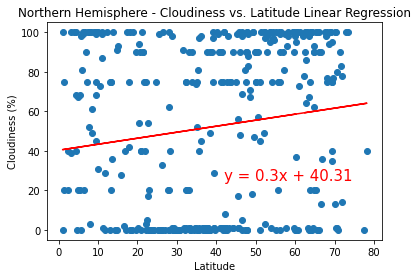

In [129]:
# plot the data and add line of regression

plt.scatter(north_lats,cloudiness_north)
plt.plot(north_lats,nc_fit,"r-")
plt.annotate(line_eq5,(42,25),fontsize=15,color='red')
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig(r'C:\Users\Joe\Documents\Boot_Camp\Homework\Week_6\06-Python-APIs\python-api-challenge\WeatherPy\Figures\North_Cloudiness_vs_Latitude.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [127]:
# use north_lats from previous and create variable for cloudiness
cloudiness_south = southern_hem_df.loc[:,'Cloudiness']

# perform linear regression on northern hem lats vs. cloudiness
(sc_slope,sc_int,sc_r,sc_p,nsc_std_err)=stats.linregress(south_lats,cloudiness_south)


In [128]:
# create equation of line for above
sc_fit = sc_slope * south_lats + nc_int
line_eq6 = "y = "+str(round(sc_slope,2))+ "x + " + str(round(sc_int,2))

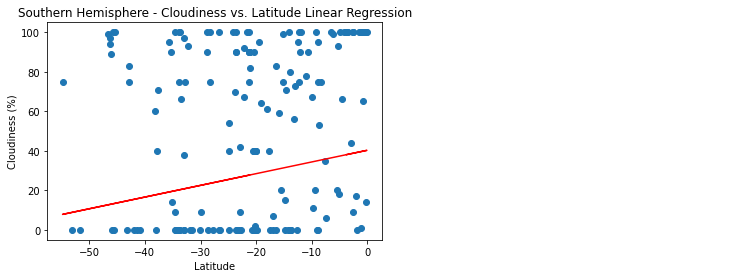

In [131]:
# plot the data and add line of regression

plt.scatter(south_lats,cloudiness_south)
plt.plot(south_lats,sc_fit,"r-")
plt.annotate(line_eq6,(42,25),fontsize=15,color='red')
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig(r'C:\Users\Joe\Documents\Boot_Camp\Homework\Week_6\06-Python-APIs\python-api-challenge\WeatherPy\Figures\South_Cloudiness_vs_Latitude.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [132]:
# use north_lats from previous and create variable for Wind Speed
wind_speed_north = northern_hem_df.loc[:,'Wind Speed']

# perform linear regression on northern hem lats vs. humidity
(nw_slope,nw_int,nw_r,nw_p,nw_std_err)=stats.linregress(north_lats,wind_speed_north)


In [133]:
# create equation of line for above
nw_fit = nw_slope * north_lats + nw_int
line_eq7 = "y = "+str(round(nw_slope,2))+ "x + " + str(round(nw_int,2))

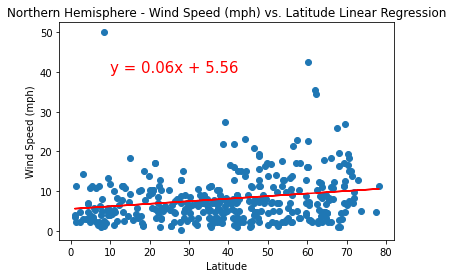

In [135]:
# plot the data and add line of regression

plt.scatter(north_lats,wind_speed_north)
plt.plot(north_lats,nw_fit,"r-")
plt.annotate(line_eq7,(10,40),fontsize=15,color='red')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig(r'C:\Users\Joe\Documents\Boot_Camp\Homework\Week_6\06-Python-APIs\python-api-challenge\WeatherPy\Figures\North_Wind_Speed_vs_Latitude.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [136]:
# use south_lats from previous and create variable for Wind Speed
wind_speed_south = southern_hem_df.loc[:,'Wind Speed']

# perform linear regression on northern hem lats vs. humidity
(sw_slope,sw_int,sw_r,sw_p,sw_std_err)=stats.linregress(south_lats,wind_speed_south)


In [137]:
# create equation of line for above
sw_fit = sw_slope * south_lats + sw_int
line_eq8 = "y = "+str(round(sw_slope,2))+ "x + " + str(round(sw_int,2))

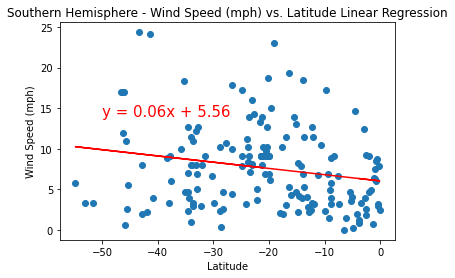

In [139]:
# plot the data and add line of regression

plt.scatter(south_lats,wind_speed_south)
plt.plot(south_lats,sw_fit,"r-")
plt.annotate(line_eq7,(-50,14),fontsize=15,color='red')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig(r'C:\Users\Joe\Documents\Boot_Camp\Homework\Week_6\06-Python-APIs\python-api-challenge\WeatherPy\Figures\South_Wind_Speed_vs_Latitude.png')